# Week 4. Case 2 - First trial
Cognitive Systems for Health Technology Applications<br>
Sakari Lukkarinen & Juha Kopu, Last edited 6.2.2018<br>
[Helsinki Metropolia University of Applied Sciences](http://www.metropolia.fi/en)

## Objectives
The aims of this first exercise are to get familiar how to
- build convolutional neural network
- image data generators to preprocess the data
- use fit_generator to train the model in batches

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras import models

%matplotlib inline

Using TensorFlow backend.


## Building network

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [3]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## Data preprocessing

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = "./dataset2/train"
validation_dir = "./dataset2/validation"

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=10,
        class_mode='binary')

Found 1031 images belonging to 2 classes.
Found 516 images belonging to 2 classes.


In [5]:
# Testing that train generator works
i = 0
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    i = i + 1
    if i > 5:
        break

data batch shape: (10, 150, 150, 3)
labels batch shape: (10,)
data batch shape: (10, 150, 150, 3)
labels batch shape: (10,)
data batch shape: (10, 150, 150, 3)
labels batch shape: (10,)
data batch shape: (10, 150, 150, 3)
labels batch shape: (10,)
data batch shape: (10, 150, 150, 3)
labels batch shape: (10,)
data batch shape: (10, 150, 150, 3)
labels batch shape: (10,)


In [6]:
labels_batch

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

## Modeling

In [10]:
# First test with very few epoch and small batch sizes
history = model.fit_generator(
      train_generator,
      steps_per_epoch = 10,
      verbose = 1,
      epochs = 5,
      validation_data = validation_generator,
      validation_steps = 10)

# Save the model
model.save('case_2_run_1.h5')

Epoch 1/5
10/10 [==============================] - 24s 2s/step - loss: 0.6208 - acc: 0.6800 - val_loss: 0.6306 - val_acc: 0.6300
Epoch 2/5
10/10 [==============================] - 24s 2s/step - loss: 0.5500 - acc: 0.7300 - val_loss: 0.6805 - val_acc: 0.6146
Epoch 3/5
10/10 [==============================] - 22s 2s/step - loss: 0.5928 - acc: 0.6700 - val_loss: 0.5286 - val_acc: 0.7500
Epoch 4/5
10/10 [==============================] - 24s 2s/step - loss: 0.5453 - acc: 0.7100 - val_loss: 0.5459 - val_acc: 0.7100
Epoch 5/5
10/10 [==============================] - 24s 2s/step - loss: 0.4703 - acc: 0.7500 - val_loss: 0.5630 - val_acc: 0.7600


## Results

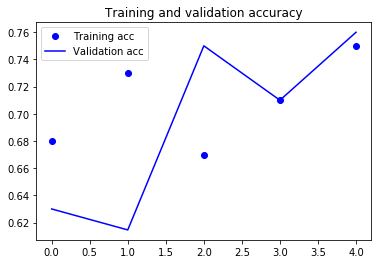

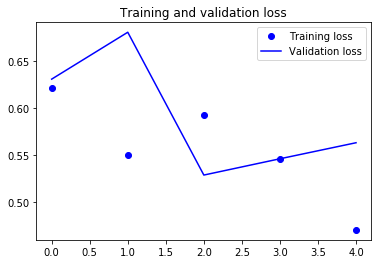

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Conclusion
If you get here, then everything should work. However, the results are far from good. The best guess (all healthy) would give accuracy about 67% (see the calculation below). First improvements could be to 
- increase the batch_sizes in the generators
- increase the steps_per_epochs and validation_steps
- increase the number of epochs,
- change the optimizer, and of course
- try different model architectures

In [15]:
# Best guess calculation
# No_symptoms / (No_symptoms + Symptoms)
print('Best guess accuracy: {:.4f}'.format(1031/(1031+516)))

Best guess accuracy: 0.6665
